<a href="https://colab.research.google.com/github/insarov2014/Stock-Price-Prediction/blob/main/TD_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb

In [1]:
import numpy as np
import pandas as pd
import time
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from datetime import date
import calendar

# Import TD stock data

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf
ticker = yf.Ticker('TD').info

In [4]:
# giving the start and end dates
startDate = '2022-01-01'
endDate = '2023-07-31'

# setting the ticker value
ticker = 'TD'

# downloading the data of the ticker value between
# the start and end dates
TD_rawData = yf.download(ticker, startDate, endDate)

# printing the first 5 rows of the data
print(TD_rawData.head(10))

# printing the last 5 rows of the data
print(TD_rawData.tail(10))

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-01-03  76.930000  77.870003  76.930000  77.760002  73.112701  1490100
2022-01-04  77.889999  78.709999  77.489998  78.209999  73.535805  2043200
2022-01-05  78.629997  79.550003  78.260002  78.300003  73.620430  1652100
2022-01-06  78.989998  79.360001  78.610001  79.070000  74.344406  3486300
2022-01-07  78.730003  79.419998  78.279999  79.209999  75.140305  3396700
2022-01-10  79.129997  79.290001  78.199997  78.690002  74.647018  1884400
2022-01-11  78.790001  80.129997  78.790001  80.110001  75.994064  1652000
2022-01-12  80.160004  81.139999  80.150002  81.139999  76.971138  2563900
2022-01-13  81.550003  82.379997  81.230003  81.370003  77.189331  1546700
2022-01-14  80.750000  82.099998  80.470001  81.639999  77.445442  1878000
                 Open       Hig

In [5]:
TD_rawData.shape

(379, 6)

I will use close price in this project.

In [6]:
TD_close_data = TD_rawData[['Close']].copy()

In [7]:
TD_close_data.shape

(379, 1)

#Visualize time series data

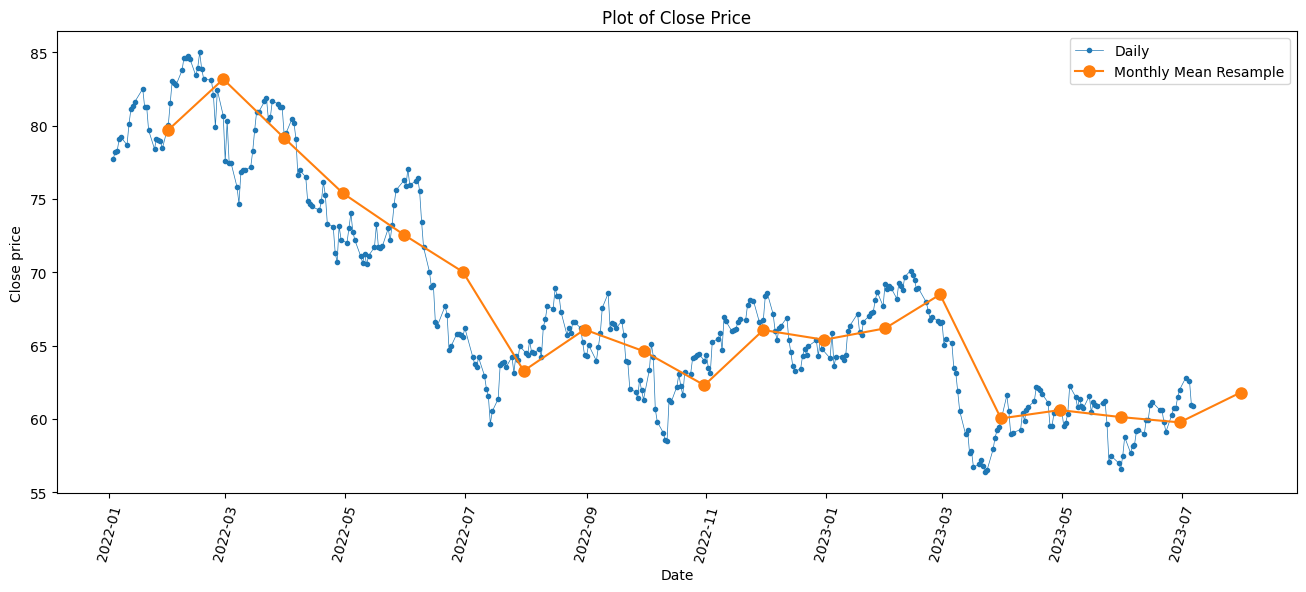

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.title('Plot of Close Price')
degrees=75
plt.xticks(rotation=degrees)
plt.xlabel('Date')
ax.plot(TD_close_data['Close'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(TD_close_data['Close'].resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Close price')
ax.legend()
plt.show()

# Decomposition

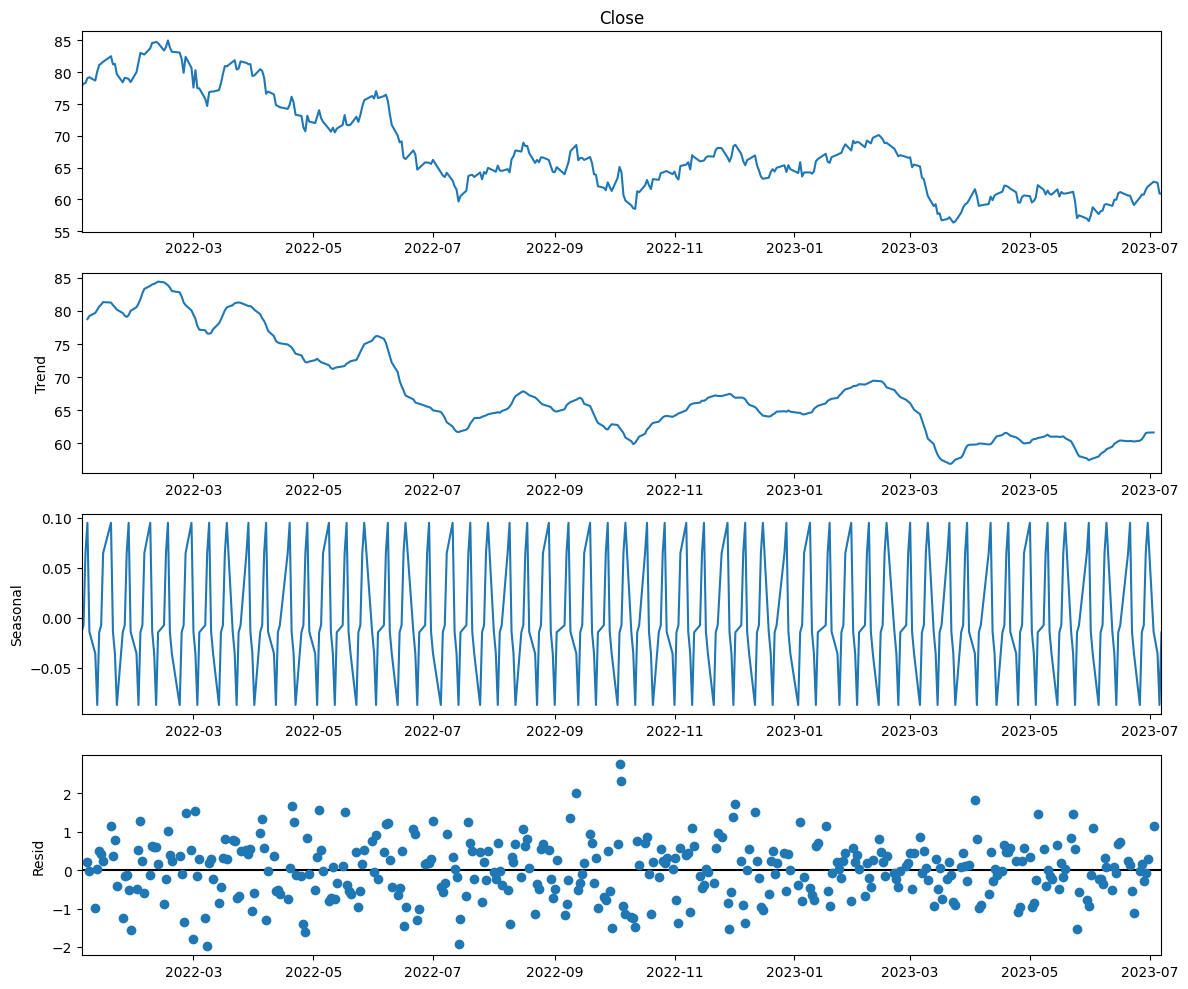

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive model
plt.rcParams["figure.figsize"] = (12, 10) # it must be put in the 1st line!
result_add = seasonal_decompose(TD_close_data['Close'], model='additive', period=7)
result_add.plot()
plt.show()

# Check stationary

###Graphing the rolling statistics

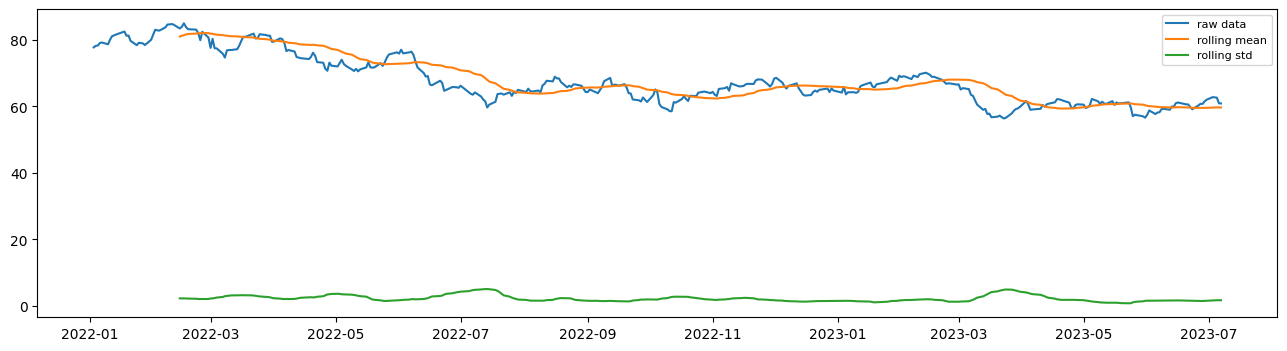

In [10]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=30).mean()
    rolstd = pd.Series(timeseries).rolling(window=30).std()

    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    ax.legend(loc='best', fontsize="8")
    plt.show()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(TD_close_data['Close'], 'raw data')

### ADF test
Null Hypothesis: The series has a unit root (is not stationary).

Alternate Hypothesis: The series has no unit root (is stationary).

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(timeseries):
    result = adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    print()
    if result[1] <= 0.05:
      print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
      print("Weak evidence against the null hypothesis, indicating it is non-stationary ")

adfuller_test(TD_close_data['Close'])

ADF Test Statistic : -1.5200036538041855
p-value : 0.5235936338331441
#Lags Used : 0
Number of Observations : 378

Weak evidence against the null hypothesis, indicating it is non-stationary 


###KPSS test

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [13]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print()
    if kpsstest[1] <= 0.05:
      print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is not stationary")
    else:
      print("Weak evidence against the null hypothesis, indicating it is stationary ")

kpss_test(TD_close_data['Close'])

Results of KPSS Test:
Test Statistic           2.36594881
p-value                  0.01000000
Lags Used               11.00000000
Critical Value (10%)     0.34700000
Critical Value (5%)      0.46300000
Critical Value (2.5%)    0.57400000
Critical Value (1%)      0.73900000
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is not stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

Case 1: Both tests conclude that the series is not stationary - The series is not stationary

Case 2: Both tests conclude that the series is stationary - The series is stationary

Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

Both conclusions indicates that the series is NOT stationary.

###Detrending

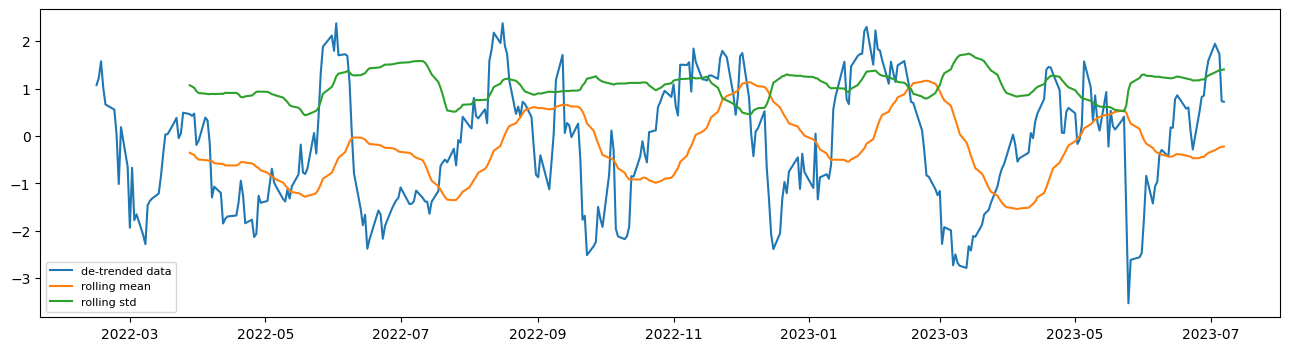

In [14]:
# Detrending
y = TD_close_data['Close']
y_detrend =  (y - y.rolling(window=30).mean())/y.rolling(window=30).std()
test_stationarity(y_detrend,'de-trended data')

In [15]:
adfuller_test(y_detrend.dropna())

ADF Test Statistic : -3.9408142085038893
p-value : 0.0017541865064793466
#Lags Used : 0
Number of Observations : 349

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [16]:
kpss_test(y_detrend.dropna())

Results of KPSS Test:
Test Statistic           0.13869978
p-value                  0.10000000
Lags Used               11.00000000
Critical Value (10%)     0.34700000
Critical Value (5%)      0.46300000
Critical Value (2.5%)    0.57400000
Critical Value (1%)      0.73900000
dtype: float64

Weak evidence against the null hypothesis, indicating it is stationary 


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


###Differencing

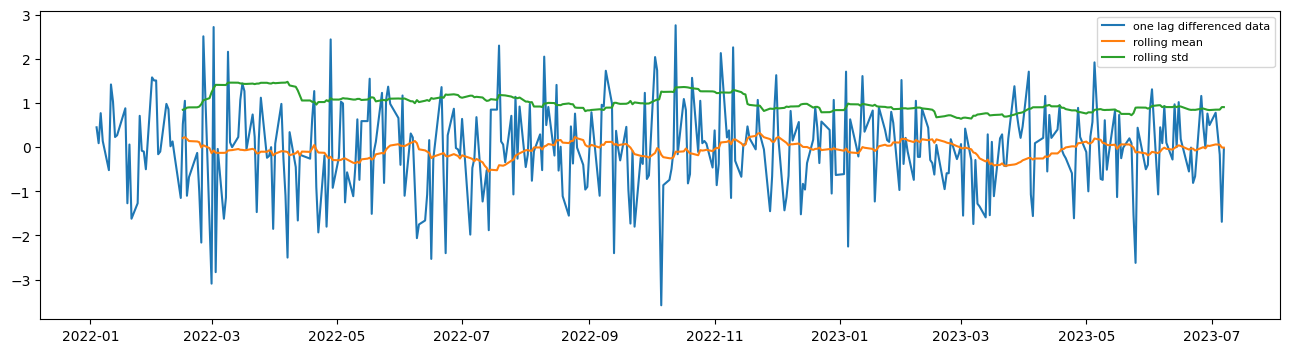

In [17]:
# Differencing
y_onelag =  y - y.shift(1)
test_stationarity(y_onelag,'one lag differenced data')

In [18]:
adfuller_test(y_onelag.dropna())

ADF Test Statistic : -19.049007345285077
p-value : 0.0
#Lags Used : 0
Number of Observations : 377

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [19]:
kpss_test(y_onelag.dropna())

Results of KPSS Test:
Test Statistic          0.04858145
p-value                 0.10000000
Lags Used               4.00000000
Critical Value (10%)    0.34700000
Critical Value (5%)     0.46300000
Critical Value (2.5%)   0.57400000
Critical Value (1%)     0.73900000
dtype: float64

Weak evidence against the null hypothesis, indicating it is stationary 


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


###Detrending + Differencing

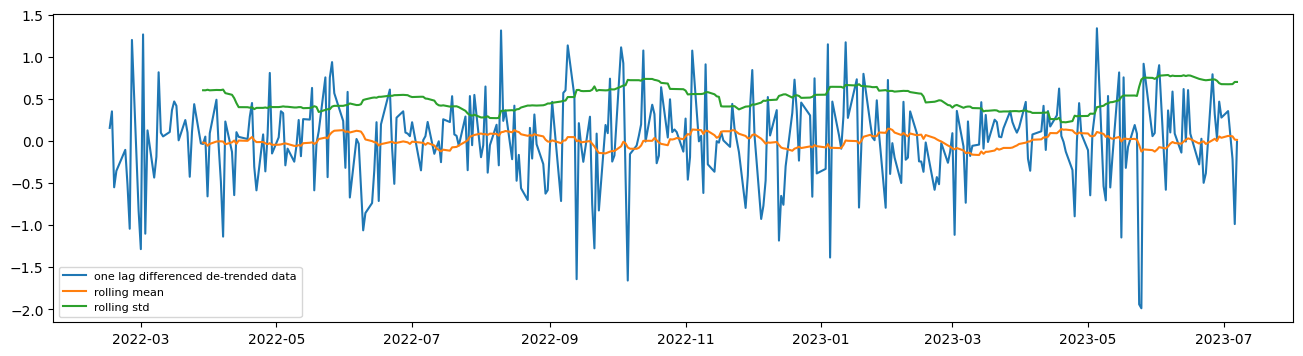

In [20]:
# Detrending + Differencing
y_onelag_detrend =  y_detrend - y_detrend.shift(1)
test_stationarity(y_onelag_detrend,'one lag differenced de-trended data')

In [21]:
adfuller_test(y_onelag_detrend.dropna())

ADF Test Statistic : -18.77071424468505
p-value : 2.0252365737781727e-30
#Lags Used : 0
Number of Observations : 348

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [22]:
kpss_test(y_onelag_detrend.dropna())

Results of KPSS Test:
Test Statistic          0.03157112
p-value                 0.10000000
Lags Used               2.00000000
Critical Value (10%)    0.34700000
Critical Value (5%)     0.46300000
Critical Value (2.5%)   0.57400000
Critical Value (1%)     0.73900000
dtype: float64

Weak evidence against the null hypothesis, indicating it is stationary 


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#Possible Models

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

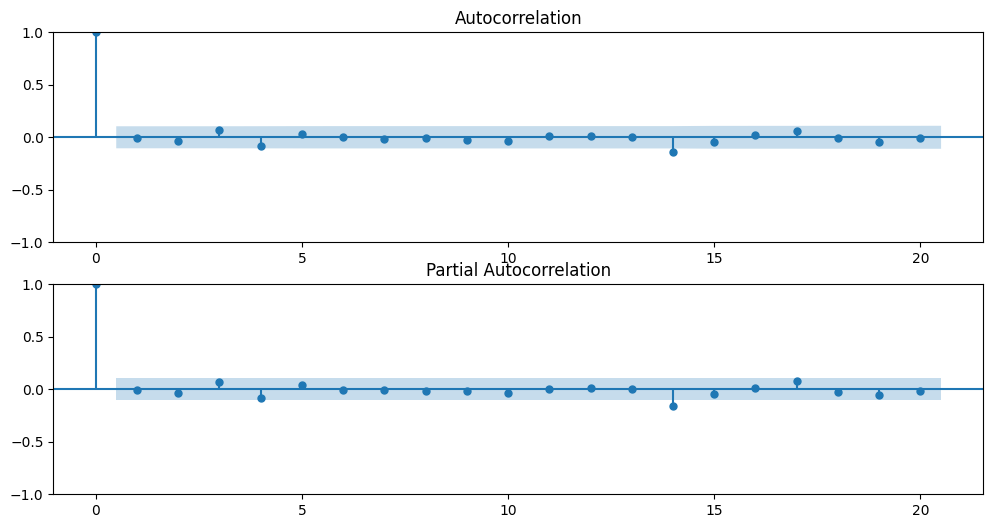

In [24]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(211)
fig = plot_acf(y_onelag_detrend.dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(y_onelag_detrend.dropna(),lags=20,ax=ax2)

AR(1), MA(1), ARMA(1, 1) may be considered. Is there a better model than these?

#Training Data and Test Data

In [25]:
train_data = TD_close_data['2022-01-03':'2023-04-01']

In [26]:
train_data.shape

(313, 1)

In [29]:
test_data = TD_close_data['2023-04-01':'2023-07-01']

In [30]:
test_data.shape

(62, 1)

In [31]:
test_data.tail(3)

,Close
Date,
2023-06-28,60.75000000
2023-06-29,61.50999832
2023-06-30,62.00999832


#Grid Search for the best model

In [32]:
import itertools
import statsmodels.api as sm

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]

    mini = float('+inf')


    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [33]:
%%time
sarima_grid_search(train_data,7)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The set of parameters with the minimum AIC is: SARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:891.1048277687756
CPU times: user 10.8 s, sys: 172 ms, total: 11 s
Wall time: 11.4 s


The best model is SARIMA(0, 1, 0)x(1, 0, 1, 7)!

### Summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.8709      0.032    -27.629      0.000      -0.933      -0.809
ma.S.L7        0.9843      0.125      7.864      0.000       0.739       1.230
sigma2         1.0024      0.123      8.122      0.000       0.761       1.244
AIC is  891.1048277687756
MSE is  24.266009995761337


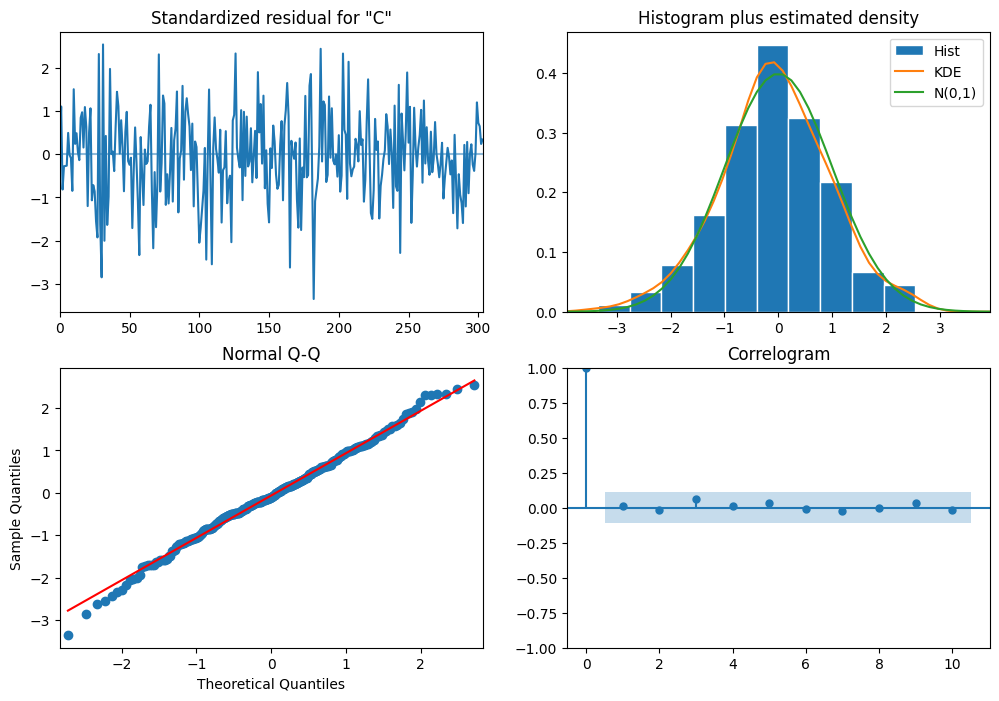

In [167]:
# fit the model
selected_model = sm.tsa.statespace.SARIMAX(train_data,
                                           order=(0, 1, 0),
                                           seasonal_order=(1, 0, 1, 7),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

results = selected_model.fit()
print(results.summary().tables[1])
print('AIC is ', results.aic)
print('MSE is ', results.mse)

results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Model Validation

In [168]:
pred = results.get_forecast(steps=62)
Apr_to_Jun_pred = pd.concat([pd.DataFrame(pred.predicted_mean), pred.conf_int()], axis=1)
Apr_to_Jun_pred.index = test_data.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [169]:
Apr_to_Jun_pred

,predicted_mean,lower Close,upper Close
Date,,,
2023-04-03,59.89641036,57.92398218,61.86883854
2023-04-04,59.76362052,56.97418584,62.55305520
2023-04-05,59.73688215,56.32053633,63.15322797
2023-04-06,59.74107069,55.79642064,63.68572073
2023-04-10,59.95620614,55.54609172,64.36632056
...,...,...,...
2023-06-26,59.86515565,44.05041997,75.67989133
2023-06-27,59.85630612,43.90986287,75.80274937
2023-06-28,59.85769239,43.78063805,75.93474673


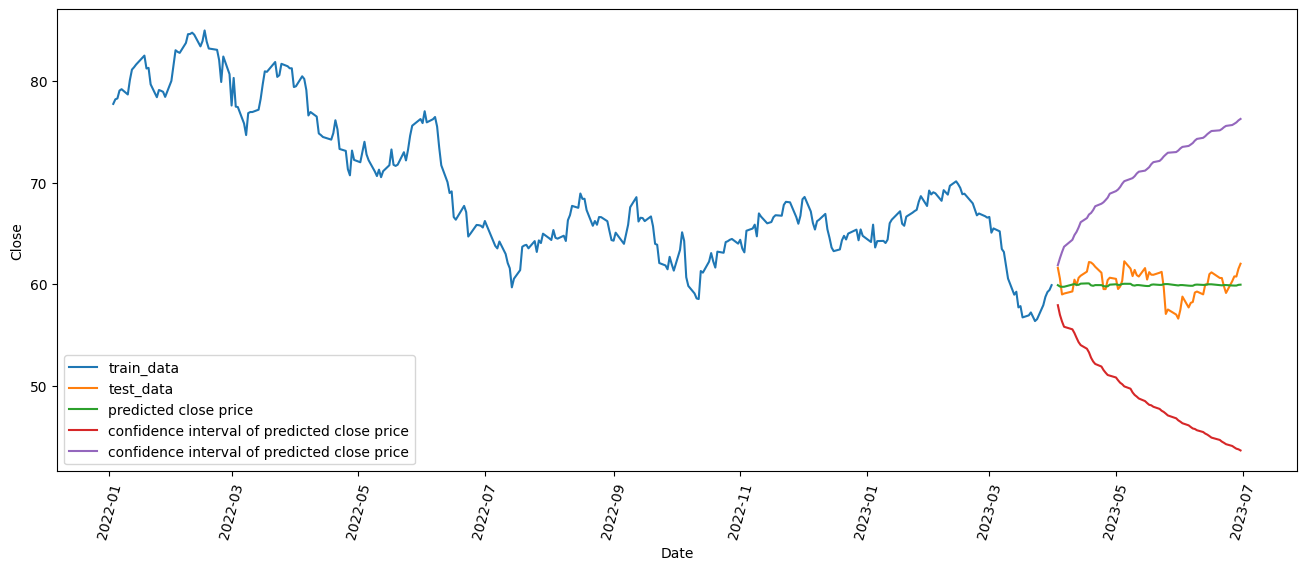

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(train_data, label='train_data')
ax.plot(test_data, label='test_data')
ax.plot(Apr_to_Jun_pred['predicted_mean'], label='predicted close price')
ax.plot(Apr_to_Jun_pred[['lower Close',	'upper Close']], label='confidence interval of predicted close price')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)
degrees=75
plt.xticks(rotation=degrees)
plt.legend(loc='best')
plt.show()

In [171]:
mse_test = ((np.array(pred.predicted_mean) - np.array(test_data['Close']))**2).mean()
print('The Mean Squared Error of SARIMA model on the test data is ',round(mse_test, 2))

The Mean Squared Error of SARIMA model on the test data is  1.88


If I use all the Close data, I will have a result slightly different from the previous one.

The first date in test_data is Apr. 3rd, 2023.

In [175]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC
def sarima_eva(y,order,seasonal_order,seasonal_period,test_data):
    # fit the model
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=order,
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    print()

    results.plot_diagnostics(figsize=(12, 8))
    plt.show()

    # The dynamic=False argument ensures that we produce one-step ahead forecasts,
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start='2023-04-03', end='2023-06-30', dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    #mse = ((y_forecasted.values - test_data.values) ** 2).mean()
    mse = ((np.array(y_forecasted) - np.array(test_data['Close']))**2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False is {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('MSE is', mse)
    print()
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts.
    # In this case, we only use information from the time series up to a certain point,
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start='2023-04-03', end='2023-06-30', dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic.values - test_data.values) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True is {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))
    print('MSE is', mse_dynamic)
    print()

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()

    return (results)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.8653      0.028    -30.790      0.000      -0.920      -0.810
ma.S.L7        1.0000    415.500      0.002      0.998    -813.364     815.364
sigma2         0.9287    385.853      0.002      0.998    -755.329     757.186



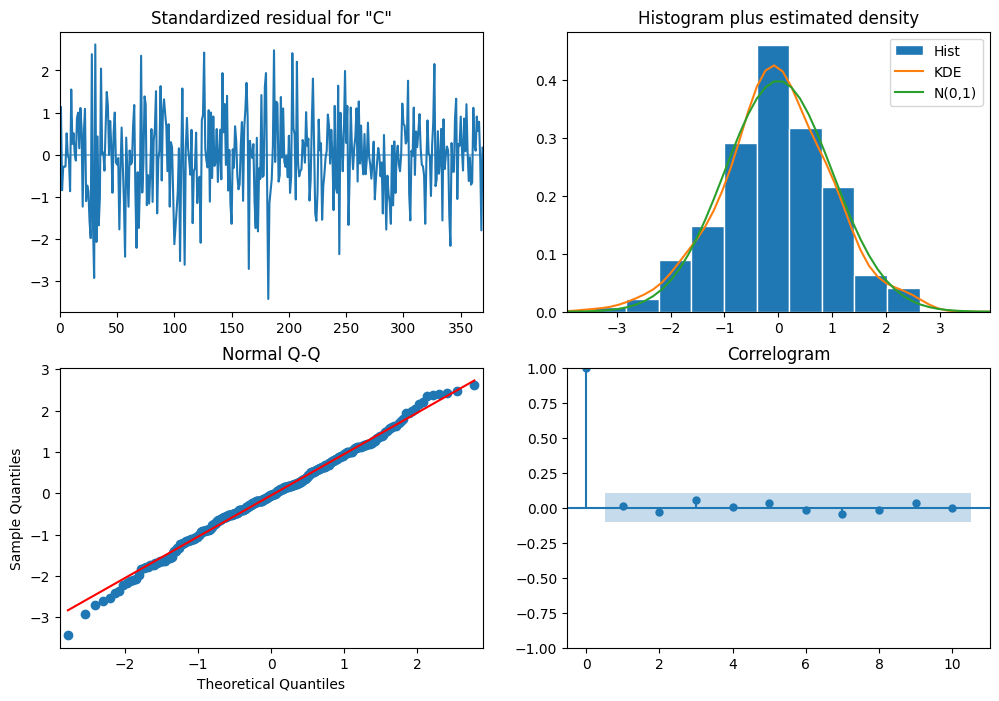

The Root Mean Squared Error of SARIMA with season_length=7 and dynamic = False is 0.81
MSE is 0.6486730357088698



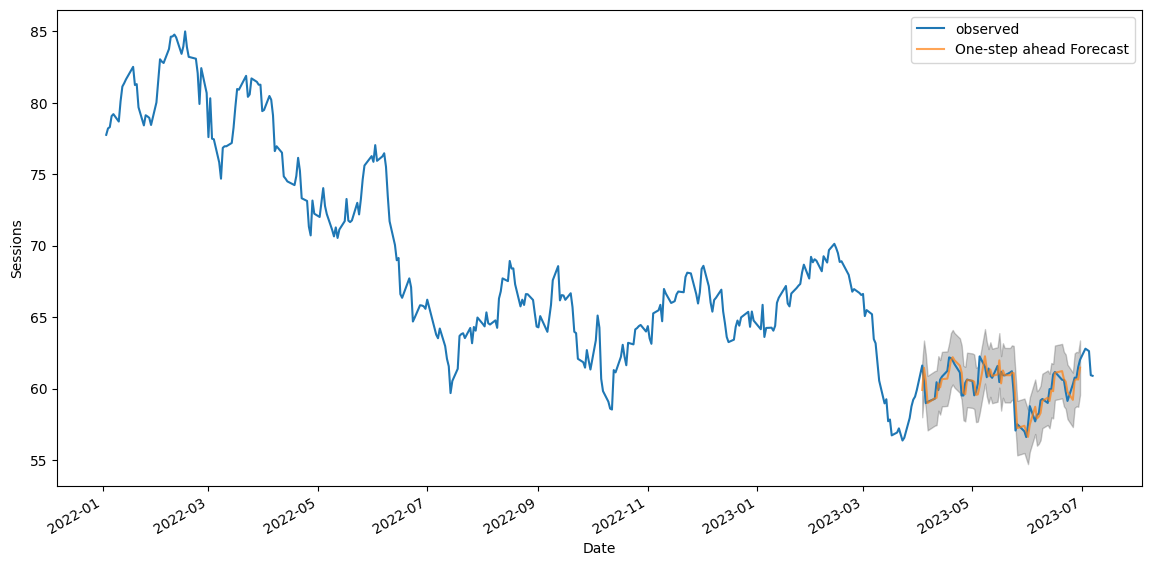

The Root Mean Squared Error of SARIMA with season_length=7 and dynamic = True is 1.38
MSE is 1.9146672443312762



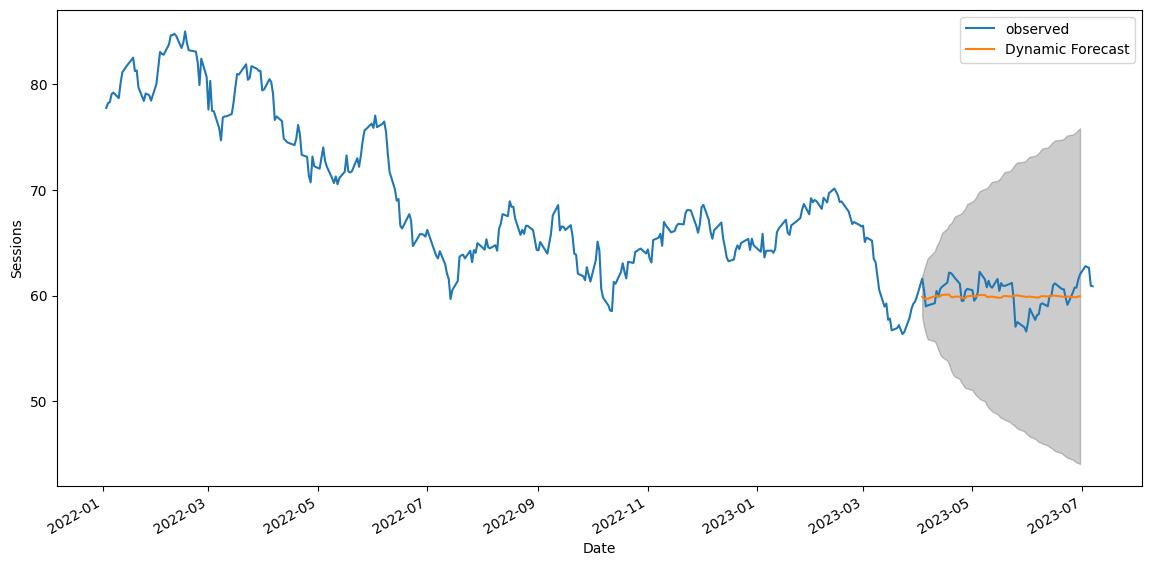

In [176]:
model_alldata = sarima_eva(y, (0, 1, 0), (1, 0, 1, 7), 7, test_data)

I am curious what would be the close price in July 2023.

# July Prediction

There are 62 stock dates in April through June 2023, and there are 20 stock dates in July 2023.

In [252]:
Apr_to_Jul = results.get_forecast(steps=82)
Jul_pred = pd.concat([pd.DataFrame(Apr_to_Jul.predicted_mean), Apr_to_Jul.conf_int()], axis=1).reset_index()
Jul_pred = Jul_pred.drop('index', axis=1).loc[Jul_pred.index>61]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [253]:
Jul_pred

,predicted_mean,lower Close,upper Close
62,59.91981867,43.45714731,76.38249003
63,59.92085380,43.32318065,76.51852696
64,59.95912951,43.22754381,76.69071521
65,59.96683665,43.10240171,76.83127159
66,59.96562933,42.96936849,76.96189017
67,59.90361810,42.77654599,77.03069022
68,59.88945633,42.63256449,77.14634817
69,59.91152294,42.52578072,77.29726517
70,59.91062144,42.40396910,77.41727378
71,59.87728676,42.25055367,77.50401985


In [264]:
from datetime import timedelta, date, datetime

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

weekdays = [6,7]
July_index = []
for dt in daterange(datetime(2023, 7, 1), datetime(2023, 7, 31)):
    if dt.isoweekday() not in weekdays:
        July_index.append(pd.to_datetime(dt))

July_index

[Timestamp('2023-07-03 00:00:00'),
 Timestamp('2023-07-04 00:00:00'),
 Timestamp('2023-07-05 00:00:00'),
 Timestamp('2023-07-06 00:00:00'),
 Timestamp('2023-07-07 00:00:00'),
 Timestamp('2023-07-10 00:00:00'),
 Timestamp('2023-07-11 00:00:00'),
 Timestamp('2023-07-12 00:00:00'),
 Timestamp('2023-07-13 00:00:00'),
 Timestamp('2023-07-14 00:00:00'),
 Timestamp('2023-07-17 00:00:00'),
 Timestamp('2023-07-18 00:00:00'),
 Timestamp('2023-07-19 00:00:00'),
 Timestamp('2023-07-20 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-07-24 00:00:00'),
 Timestamp('2023-07-25 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-07-27 00:00:00'),
 Timestamp('2023-07-28 00:00:00'),
 Timestamp('2023-07-31 00:00:00')]

In [265]:
# July 4, 2023 is not a stock date
July_index[1]

Timestamp('2023-07-04 00:00:00')

In [266]:
July_index.remove(July_index[1])

In [267]:
len(July_index)

20

In [268]:
Jul_pred.index = July_index
Jul_pred

,predicted_mean,lower Close,upper Close
2023-07-03,59.91981867,43.45714731,76.38249003
2023-07-05,59.92085380,43.32318065,76.51852696
2023-07-06,59.95912951,43.22754381,76.69071521
2023-07-07,59.96683665,43.10240171,76.83127159
2023-07-10,59.96562933,42.96936849,76.96189017
2023-07-11,59.90361810,42.77654599,77.03069022
2023-07-12,59.88945633,42.63256449,77.14634817
2023-07-13,59.91152294,42.52578072,77.29726517
2023-07-14,59.91062144,42.40396910,77.41727378
2023-07-17,59.87728676,42.25055367,77.50401985


In [269]:
Jul_pred.rename(columns={'predicted_mean':'Close'}, inplace=True)
Jul_pred

,Close,lower Close,upper Close
2023-07-03,59.91981867,43.45714731,76.38249003
2023-07-05,59.92085380,43.32318065,76.51852696
2023-07-06,59.95912951,43.22754381,76.69071521
2023-07-07,59.96683665,43.10240171,76.83127159
2023-07-10,59.96562933,42.96936849,76.96189017
2023-07-11,59.90361810,42.77654599,77.03069022
2023-07-12,59.88945633,42.63256449,77.14634817
2023-07-13,59.91152294,42.52578072,77.29726517
2023-07-14,59.91062144,42.40396910,77.41727378
2023-07-17,59.87728676,42.25055367,77.50401985


In [270]:
new_table = pd.concat([test_data, Jul_pred[['Close']]], axis=0)

In [271]:
new_table

,Close
2023-04-03,61.61000061
2023-04-04,60.54000092
2023-04-05,58.97999954
2023-04-06,59.06999969
2023-04-10,59.27999878
...,...
2023-07-25,59.91953290
2023-07-26,59.94856440
2023-07-27,59.95441015
2023-07-28,59.95349442


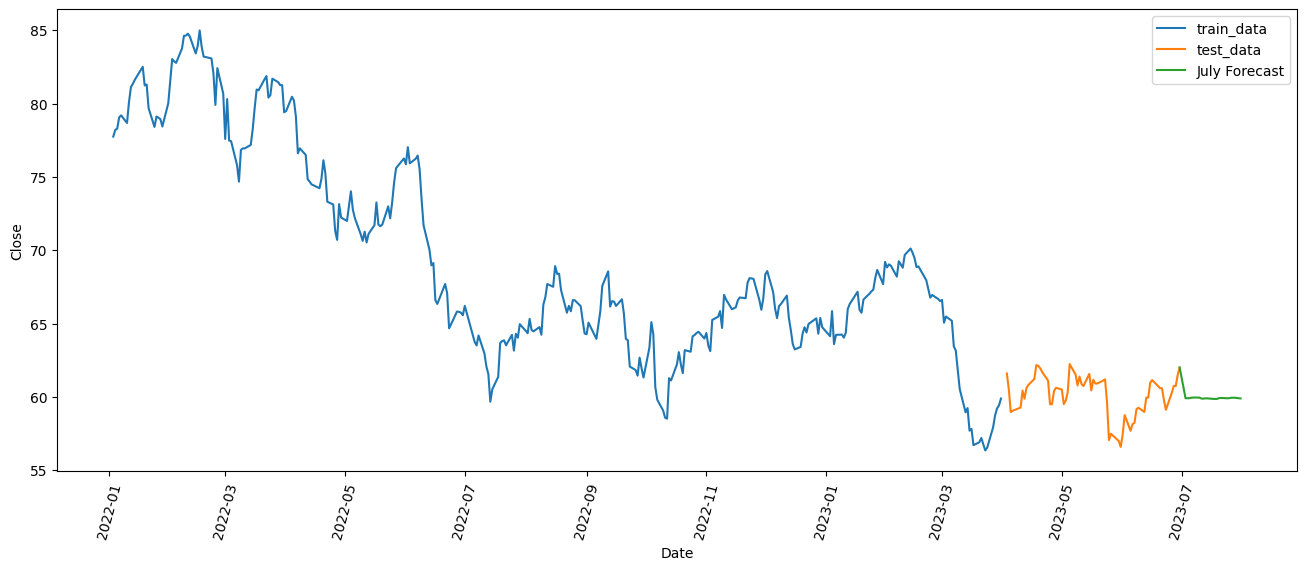

In [272]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(train_data, label='train_data')
#ax.plot(new_table[:62], label='test_data')
ax.plot(test_data, label='test_data')
ax.plot(new_table[61:], label='July Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)
degrees=75
plt.xticks(rotation=degrees)
plt.legend(loc='best')
plt.show()

#How close is the predicted close price to the actual close price for the 1st week of July?

In [273]:
new_table.loc[(new_table.index >='2023-07-03') & (new_table.index <='2023-07-08')]

,Close
2023-07-03,59.91981867
2023-07-05,59.92085380
2023-07-06,59.95912951
2023-07-07,59.96683665


In [274]:
TD_close_data.loc[(TD_close_data.index >='2023-07-03') & (TD_close_data.index <='2023-07-08')]

,Close
Date,
2023-07-03,62.79000092
2023-07-05,62.61999893
2023-07-06,60.93000031
2023-07-07,60.88999939
